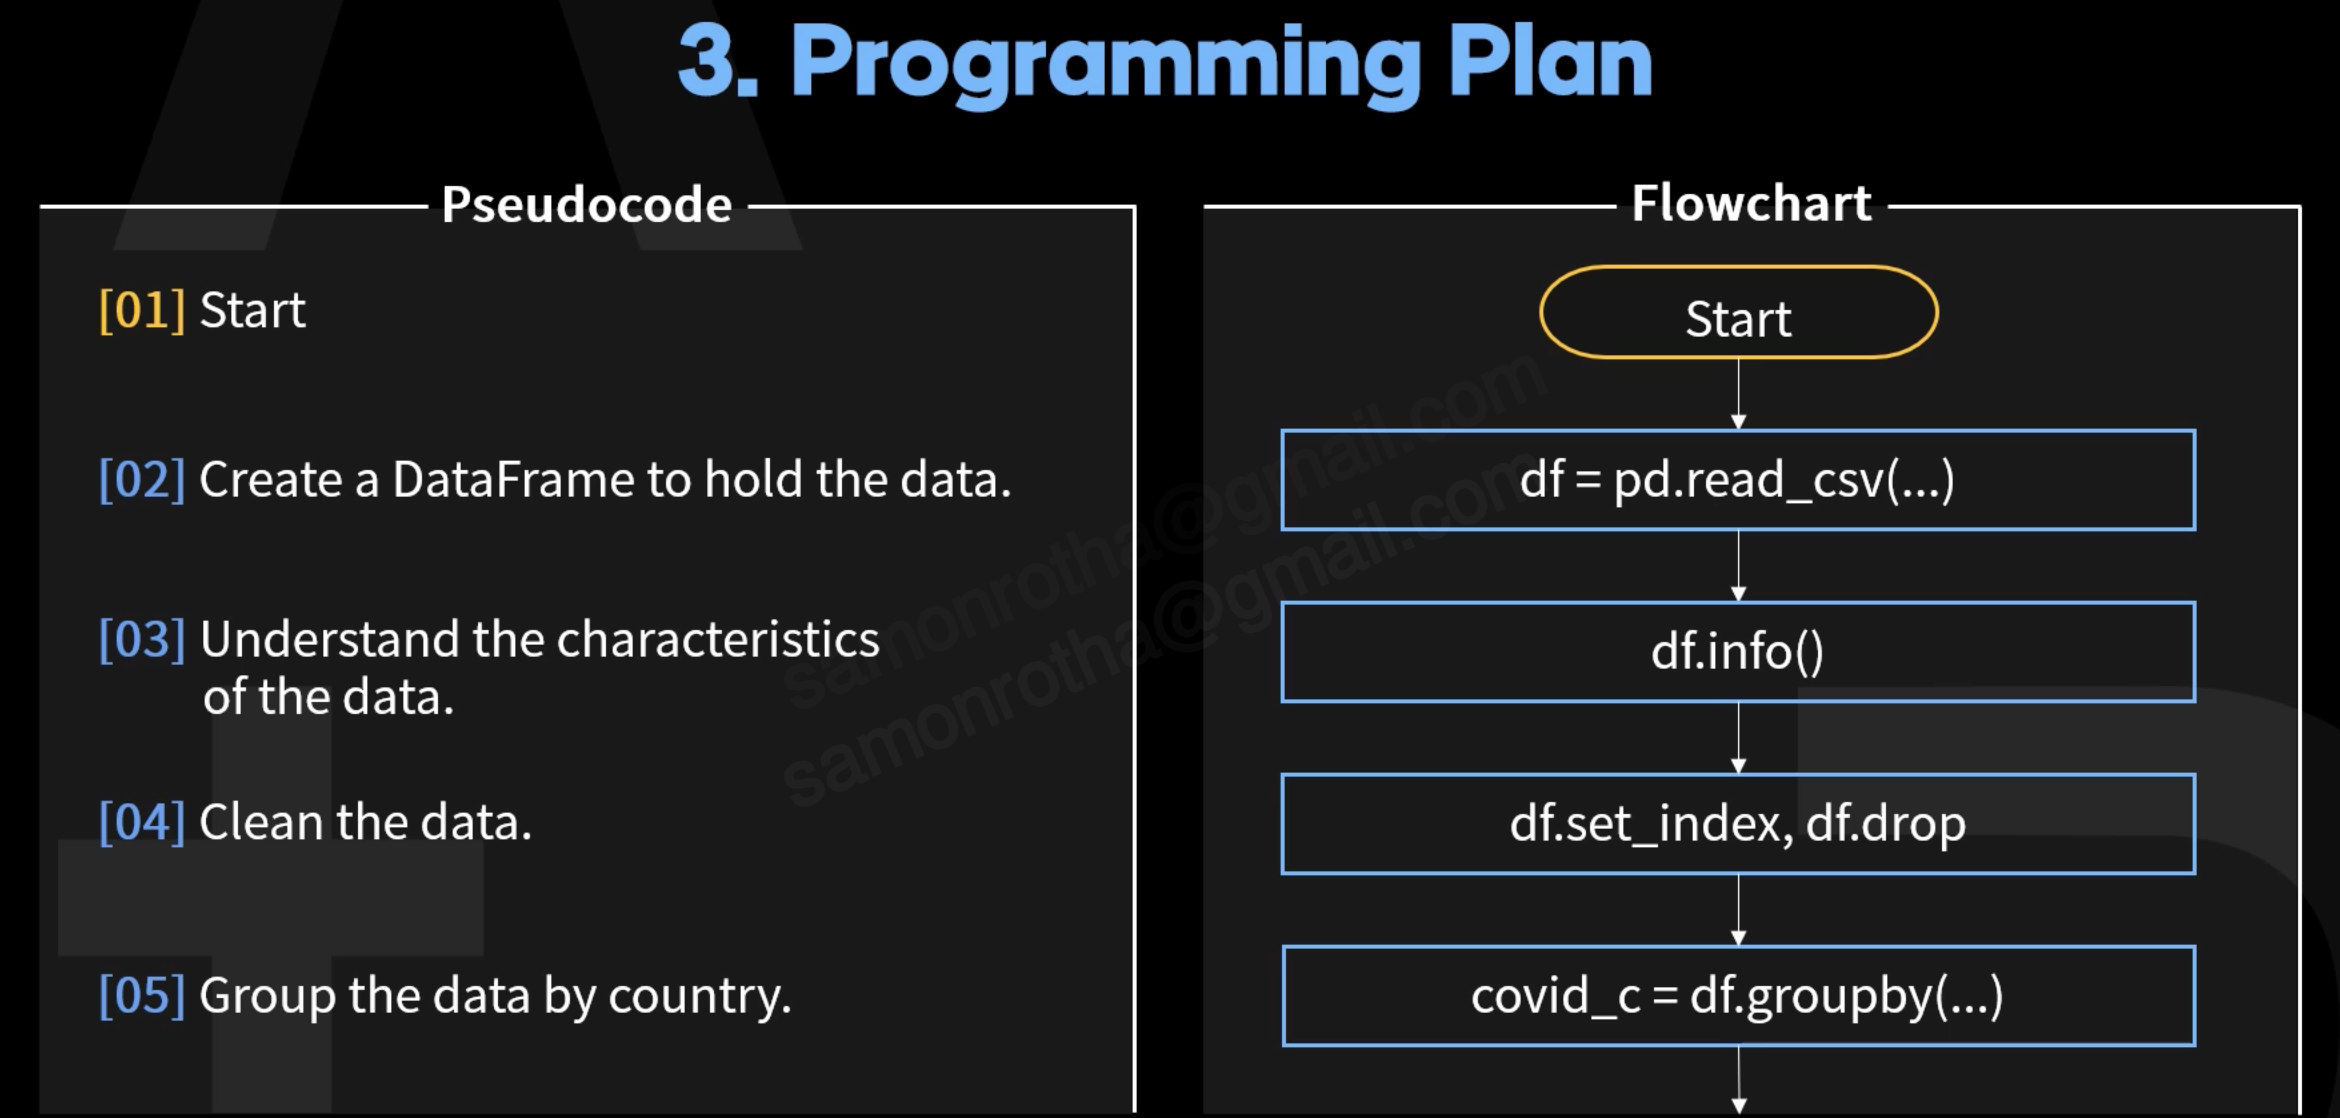

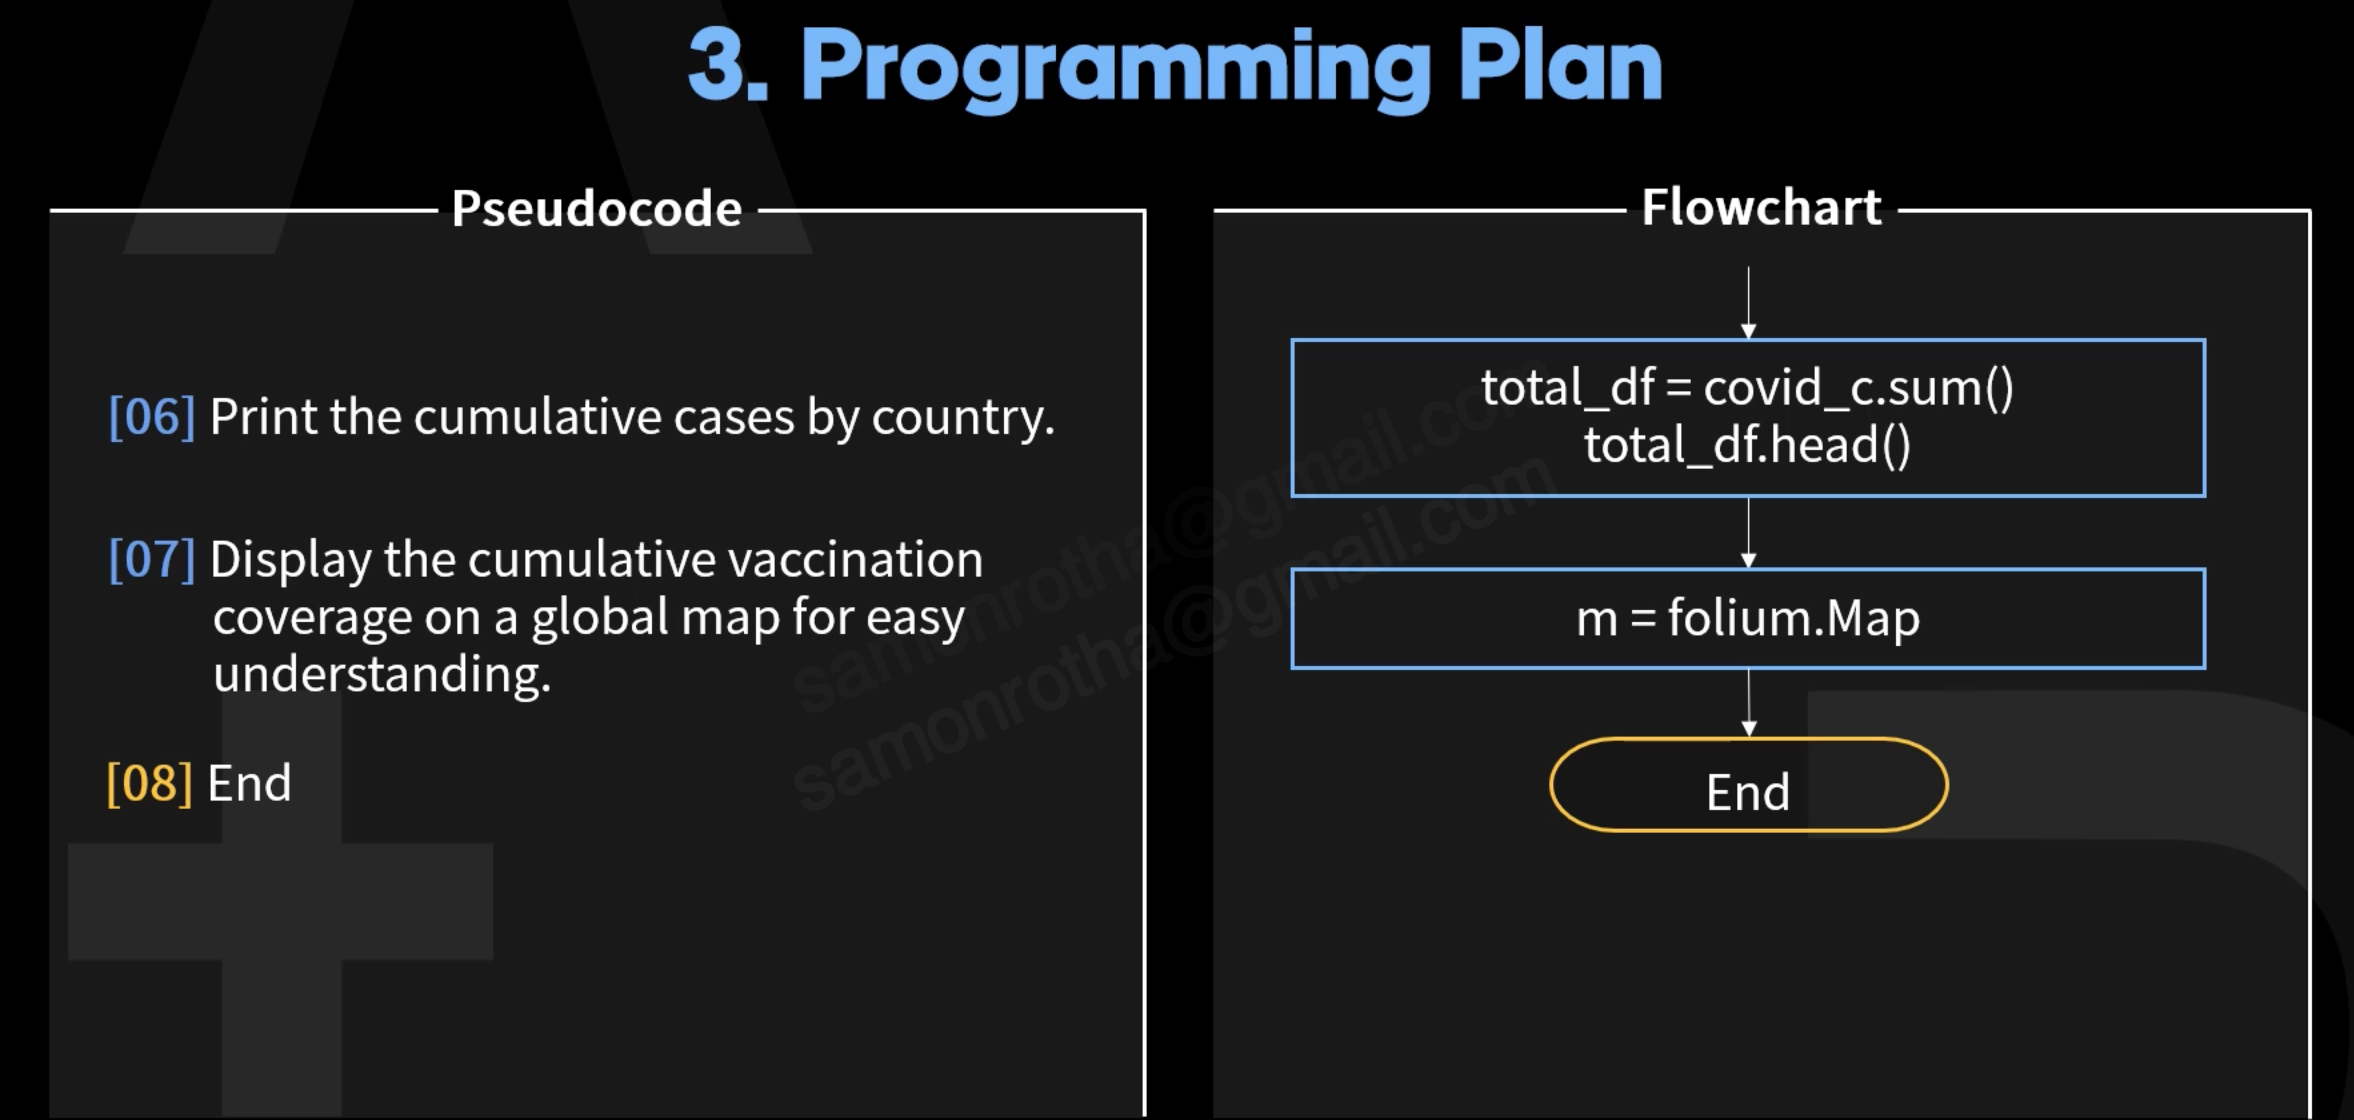

### Mini Project for Analysis of Global COVID-19 Pandemic Situation

In [9]:
import pandas as pd

#convert the covid-19 data
df = pd.read_csv("covid-vaccination-doses-per-capita.csv")
print(df.head())


df['Date'] = pd.to_datetime(df['Day']) #Conversion to 'datetime' is required.
df.set_index('Date', inplace = True) #Change the index to a new column
df.drop(['Day'], axis = 1, inplace = True) #Remove unnescessary column
df.head()


len(df['Entity'].unique()) #It observed that there are data from a total 236 countries


covid_c = df.groupby('Entity') # Create groups based on the 'Entity' column to generate a new dataframe.


#Observed that the number of rows(len of DataFrame) for each key, which represents the country name, varies.
for key, group in covid_c:
    print('+key:', key)
    print('+number:', len(group))
    print(group.head()) #print 5 rows for each group
    print('\n')
    
    
total_df = covid_c.sum(numeric_only = True)
total_df.head()



import folium
#Input the coordinates of the map's center with latitude and longitude in order.
map = folium.Map(loacation = [37.257075, 127.052126],
                zoom_start = 13, #Initial zoom level when rending the map
                titles = 'stamenwatercolor' #Various tile style can be selected as the background of the map
                )



#Display marker icons and info at specific locations
marker_map = folium.Map(location = [45.372, -121.6972], zoom_start = 12, titles = "steam Terrain")

folium.Marker(
    location = [45.372, -121.6972], # latittude and longitude info for displaying the marker
    popup = "Mt. Hood Meadows", # infomation to be shown as a popup message when the marker is clicked
    icon = folium.Icon(icon = "cloud"), #marker icon style
).add_to(marker_map)
    
folium.Marker(
    location = [45.3311, -121.7113],
    popup = "Timberline Lodge",
    icon = folium.Icon(icon = "green"),
).add_to(marker_map)

folium.CircleMarker( # specify an area with a circle
    location = [45.3800, -121.6000], 
    radius = 100, # specify the size of the circle
    popup = "circle", # info to be shown as a popup message when the circle is clicked
    color = '#3186cc' #color of the border line of th circle
    fill = True, # whether tofill the inside of the circle
    fill_color = "#3186cc"
).add_to(marker_map)
marker_map



import pandas as pd

url = ("https://raw.githubusercontent.com/python-visualization/folium/master/examples/data")
state_geo = f"{url}/us-states.json"
state_unemployment = f"{url}/US_Unemployment_Oct2012.csv"
state_data = pd.read_csv(state_unemployment)

m = folium.Map(location = [48, -102], zoom_start = 3)

folium.Choropleth(
geo_data = state_geo,
name = "choropleth",
data = state_data,
columns = ["State", "Unemployment"],
key_on = "feature.id",
fill_color = "YlGn",
fill_opacity = 0.7,
line_opacity = 0.2,
legend_name = "Unemployment Rate (%)",
).add_to(m)

folium.LayerControl().add_to(m)





import folium
import json

center = [35.762887375145795, 84.08313219586536]

m = folium.Map(location = center, zoom_start = 2,
              max_bounds = True,
              min_zoom = 1, min_lat = -84,
              max_lat = 84, min_lon = -175, max_lon = 187,
              )
geo_path = "World_Countries_(Generalized)_-4149901768586864241.geojson"

json_data = json.load(open(geo_path, encoding = 'utf-8'))

folium.Choropleth(geo_data = json_data,
                 data = total_df,
                 columns = (total_df.index, 'total_vaccinations_per_hundred'),
                 key_on = 'properties.COUNTRY',
                 fill_color = 'RdYlGn',
                 fill_opacity = 0.5,
                 line_opacity = 0.5,
                 ).add_to(m)
folium.LayerControl().add_to(m)
m

SyntaxError: invalid syntax. Perhaps you forgot a comma? (3477215438.py, line 61)

In [5]:
import pandas as pd
import folium
import json


#convert the covid-19 data
df = pd.read_csv("covid-vaccination-doses-per-capita.csv")
print(df.head())

print('\n < Basic infomation for data>')
print(df.info())

print('\n <Data tidying>')
df['Date'] = pd.to_datetime(df['Day']) #Conversion to 'datetime' is required.
df.set_index('Date', inplace = True) #Change the index to a new column
df.drop(['Day'], axis = 1, inplace = True) #Remove unnescessary column
df.head()


print('\n <Accumulation by country')
covid_c = df.groupby('Entity')
total_df = covid_c.sum(numeric_only = True)
print(total_df.head())

center = [35.762887375145795, 84.08313219586536]
m = folium.Map(location = center, zoom_start = 2,
              max_bounds = True,
              min_zoom = 1, min_lat = -84,
              max_lat = 84, min_lon = -175, max_lon = 187,
              )
geo_path = "World_Countries_(Generalized)_-4149901768586864241.geojson"

json_data = json.load(open(geo_path, encoding = 'utf-8'))

folium.Choropleth(geo_data = json_data,
                 data = total_df,
                 columns = (total_df.index, 'total_vaccinations_per_hundred'),
                 key_on = 'properties.COUNTRY',
                 fill_color = 'RdYlGn',
                 fill_opacity = 0.5,
                 line_opacity = 0.5,
                 ).add_to(m)

folium.LayerControl().add_to(m)
m



        Entity Code         Day  total_vaccinations_per_hundred
0  Afghanistan  AFG  2021-02-22                            0.00
1  Afghanistan  AFG  2021-02-28                            0.02
2  Afghanistan  AFG  2021-03-16                            0.13
3  Afghanistan  AFG  2021-04-07                            0.29
4  Afghanistan  AFG  2021-04-22                            0.58

 < Basic infomation for data>
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84009 entries, 0 to 84008
Data columns (total 4 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Entity                          84009 non-null  object 
 1   Code                            67162 non-null  object 
 2   Day                             84009 non-null  object 
 3   total_vaccinations_per_hundred  84009 non-null  float64
dtypes: float64(1), object(3)
memory usage: 2.6+ MB
None

 <Data tidying>

 <Accumulation by country
          

FileNotFoundError: [Errno 2] No such file or directory: 'World_Countries_(Generalized)_-4149901768586864241.geojson'

In [6]:
import folium
#Input the coordinates of the map's center with latitude and longitude in order.
map = folium.Map(loacation = [37.257075, 127.052126],
                zoom_start = 13, #Initial zoom level when rending the map
                titles = 'stamenwatercolor' #Various tile style can be selected as the background of the map
                )
map.save


<bound method Element.save of <folium.folium.Map object at 0x11f6486d0>>

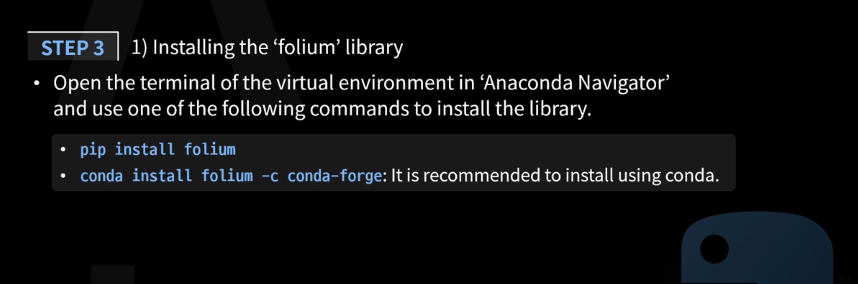

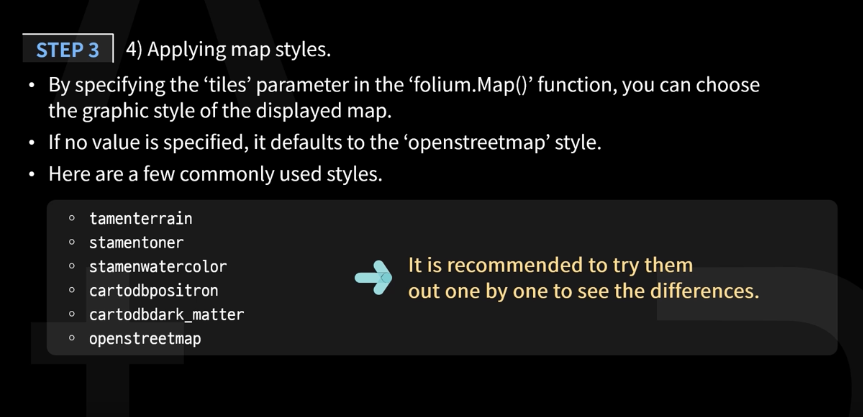

In [2]:
import folium
import json

center = [35.762887375145795, 84.08313219586536]

m = folium.Map(location = center, zoom_start = 2,
              max_bounds = True,
              min_zoom = 1, min_lat = -84,
              max_lat = 84, min_lon = -175, max_lon = 187,
              )
geo_path = "World_Countries_(Generalized)_-4149901768586864241.geojson"

json_data = json.load(open(geo_path, encoding = 'utf-8'))

folium.Choropleth(geo_data = json_data,
                 data = total_df,
                 columns = (total_df.index, 'total_vaccinations_per_hundred'),
                 key_on = 'properties.COUNTRY',
                 fill_color = 'RdYlGn',
                 fill_opacity = 0.5,
                 line_opacity = 0.5,
                 ).add_to(m)
folium.LayerControl().add_to(m)
m

ModuleNotFoundError: No module named 'folium'